# Importing data, data wrangling and data visualization  #

In [1]:
#Importing the data labelled as excel file
import pandas as pd
data=pd.read_excel("DLI_CO_DATA.xlsx")
data=data.iloc[:,[0,1,2,3,4,5,6]]
#Checking the first five rows of data
data.tail()

,Date/Time,NO2 (μg/m3),SO2 (μg/m3),O3 (μg/m3),CO (μg/m3),PM10 (μg/m3),PM 2.5 (μg/m3)
7531,2020-11-09 19:00:00,123.66430,6.942140,2.626272,2626.576,112.54680,34.47053
7532,2020-11-09 20:00:00,102.62100,7.881799,2.665070,2744.537,185.77910,51.01247
7533,2020-11-09 21:00:00,83.50191,6.309392,1.787648,2180.894,152.05290,50.29734
7534,2020-11-09 22:00:00,65.23309,5.243093,1.287961,1759.910,122.83820,48.03581
7535,2020-11-09 23:00:00,56.35237,3.984219,1.077103,1304.964,94.77707,41.15864


In [2]:

data.describe()

,NO2 (μg/m3),SO2 (μg/m3),O3 (μg/m3),CO (μg/m3),PM10 (μg/m3),PM 2.5 (μg/m3)
count,7264.000000,7274.000000,7362.000000,6997.000000,6726.000000,6726.000000
mean,23.968555,3.067455,63.610180,409.493261,33.370853,15.989407
std,18.538643,1.643609,30.848370,307.054231,17.897849,8.358157
min,2.022262,-0.774268,0.014875,2.108561,3.628684,0.132455
25%,10.316430,1.966954,43.379055,253.307800,21.676922,10.145833
50%,18.737530,2.853870,67.698200,334.352700,30.332415,14.936345
75%,32.002898,3.953351,85.787780,437.327200,40.135680,20.494515
max,160.891600,16.814840,160.383000,3299.964000,185.779100,90.161450


In [3]:
# Checking the last five rows of data
data.tail()

,Date/Time,NO2 (μg/m3),SO2 (μg/m3),O3 (μg/m3),CO (μg/m3),PM10 (μg/m3),PM 2.5 (μg/m3)
7531,2020-11-09 19:00:00,123.66430,6.942140,2.626272,2626.576,112.54680,34.47053
7532,2020-11-09 20:00:00,102.62100,7.881799,2.665070,2744.537,185.77910,51.01247
7533,2020-11-09 21:00:00,83.50191,6.309392,1.787648,2180.894,152.05290,50.29734
7534,2020-11-09 22:00:00,65.23309,5.243093,1.287961,1759.910,122.83820,48.03581
7535,2020-11-09 23:00:00,56.35237,3.984219,1.077103,1304.964,94.77707,41.15864


In [4]:
#Checking whether there are NaN values
data.isnull().values.any()

True

In [5]:
#Filling the missing values in each column with mean of each column
#data.fillna(value=data.mean(), inplace=True)

In [6]:
##Replacing the missing values using linear interpolation
data.interpolate()
data.shape

(7536, 7)

In [7]:
# Now there is no missing values in the data
data.isnull().values.any()

True

In [8]:
#Gives the number of columns and rows in our data
data.shape


(7536, 7)

In [9]:
#Summary statistics of the numeric data
data.describe()

,NO2 (μg/m3),SO2 (μg/m3),O3 (μg/m3),CO (μg/m3),PM10 (μg/m3),PM 2.5 (μg/m3)
count,7264.000000,7274.000000,7362.000000,6997.000000,6726.000000,6726.000000
mean,23.968555,3.067455,63.610180,409.493261,33.370853,15.989407
std,18.538643,1.643609,30.848370,307.054231,17.897849,8.358157
min,2.022262,-0.774268,0.014875,2.108561,3.628684,0.132455
25%,10.316430,1.966954,43.379055,253.307800,21.676922,10.145833
50%,18.737530,2.853870,67.698200,334.352700,30.332415,14.936345
75%,32.002898,3.953351,85.787780,437.327200,40.135680,20.494515
max,160.891600,16.814840,160.383000,3299.964000,185.779100,90.161450


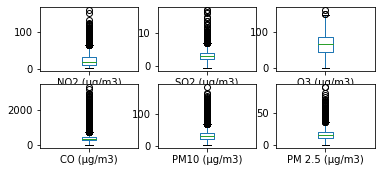

In [10]:
#Box plots
import matplotlib.pyplot as plt

data.plot(kind='box',subplots=True,layout=(3,3),sharex=True,sharey=False)
plt.show()

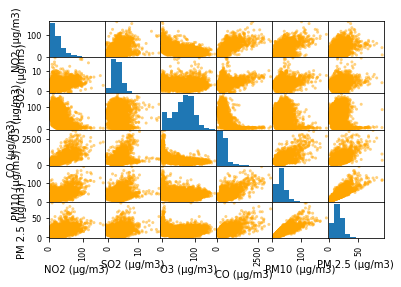

In [11]:
#Scatter matrix generation
from pandas.plotting import scatter_matrix
scatter_matrix(data, color='orange')
plt.show()

In [12]:
# Deriving the two columns: Date/Time and CO
data1=data.iloc[:,[0,1,2,3,4,5,6]]
#data.columns=['Date','CO']
#Printing the date upto period 'Day'
data1['Date'] = pd.to_datetime(data1['Date/Time']).dt.to_period('D')
#Drops all rows with missing values
#data1=data1.dropna()
#Setting the date column as an index column to allow resampling
data1=data1.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data1=data1.resample('M').mean()
data1['Date'] = data1.index
data1.columns=['NO2','SO2','O3','CO','PM10','PM2.5','Date']
data1.tail()

,NO2,SO2,O3,CO,PM10,PM2.5,Date
Date,,,,,,,
2020-07,19.815369,2.591035,82.537552,358.082385,34.455643,17.438203,2020-07
2020-08,18.566179,2.360702,88.615772,345.517294,37.409197,22.300605,2020-08
2020-09,27.046262,2.764184,71.483942,407.526553,41.379631,19.273261,2020-09
2020-10,30.288870,2.612898,53.890996,417.516811,39.173301,17.608166,2020-10
2020-11,39.797992,3.909143,37.021178,529.173213,37.285610,19.309060,2020-11


Text(0, 0.5, 'Concentration (μg/m3)')

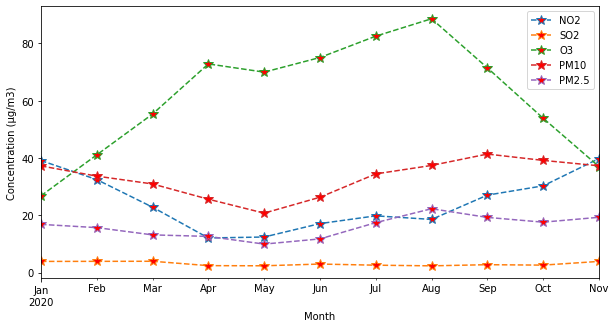

In [24]:
data1.plot(x='Date',y=['NO2','SO2','O3','PM10','PM2.5'],figsize=(10,5),linestyle='--', marker='*', markerfacecolor='r',markersize=10)

plt.xlabel('Month')
plt.ylabel('Concentration (μg/m3)')



## Time Series Lag Plot ##
A lag plot helps to check if a time series data set is random or not. A random data will be evenly spread whereas a shape or trend indicates the data is not random.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

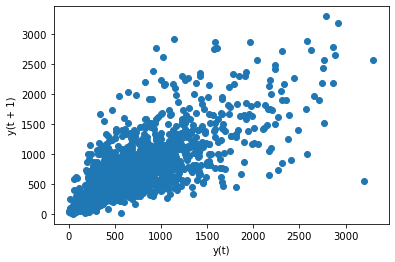

In [31]:
pd.plotting.lag_plot(data['CO (μg/m3)'])

Text(0, 0.5, 'Concentration (μg/m3)')

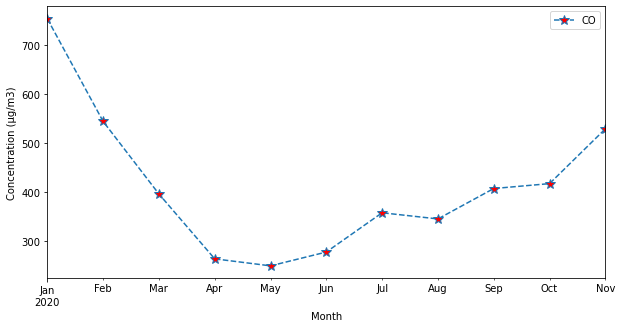

In [25]:
data1.plot(x='Date',y=['CO'],figsize=(10,5),linestyle='--', marker='*', markerfacecolor='r',markersize=10)

plt.xlabel('Month')
plt.ylabel('Concentration (μg/m3)')

<function matplotlib.pyplot.show(close=None, block=None)>

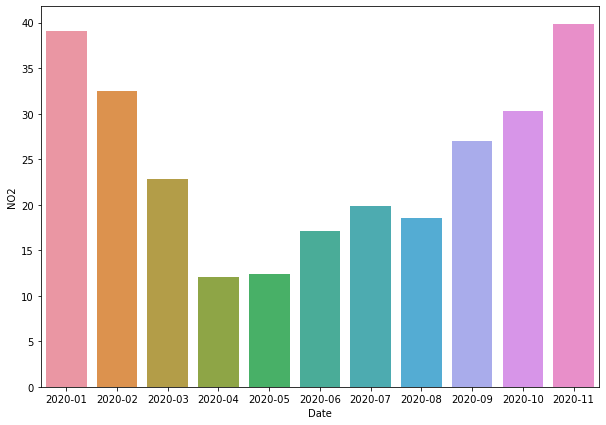

In [14]:
import matplotlib.pyplot as plt
import seaborn as s
fig,ax=plt.subplots(figsize=(10,7))
ax=s.barplot(x='Date',y='NO2', data=data1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

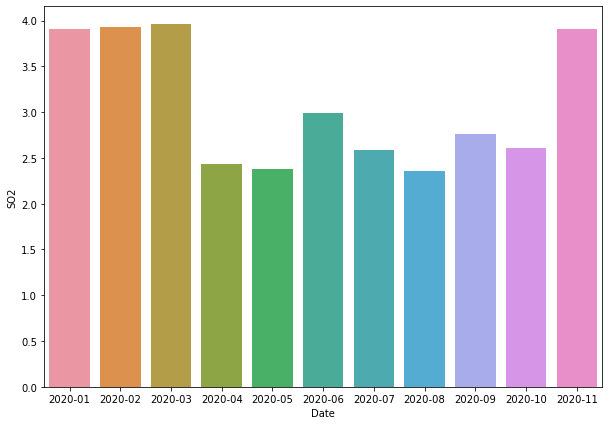

In [296]:
fig,ax=plt.subplots(figsize=(10,7))
ax=s.barplot(x='Date',y='SO2', data=data1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

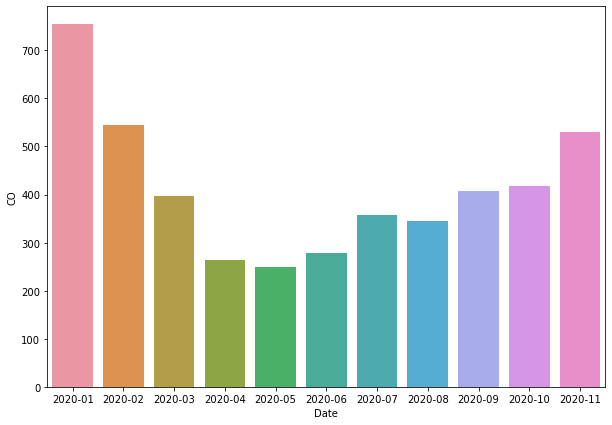

In [297]:
fig,ax=plt.subplots(figsize=(10,7))
ax=s.barplot(x='Date',y='CO', data=data1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

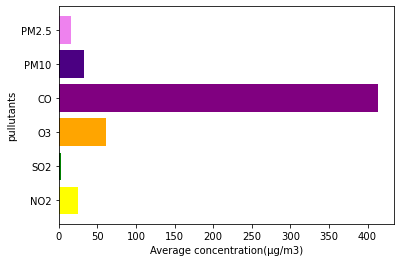

In [298]:
NO2= sum(data1['NO2'].to_list())/len(data1['NO2'].to_list())
SO2= sum(data1['SO2'].to_list())/len(data1['NO2'].to_list())
O3= sum(data1['O3'].to_list())/len(data1['NO2'].to_list())
CO=sum(data1['CO'].to_list())/len(data1['NO2'].to_list())
PM10=sum(data1['PM10'].to_list())/len(data1['NO2'].to_list())
PM2_5=sum(data1['PM2.5'].to_list())/len(data1['NO2'].to_list())

#Bar plot

pollutants=['NO2','SO2','O3','CO','PM10','PM2.5']
Ave_concent=[NO2,SO2,O3,CO,PM10,PM2_5]
plt.barh(pollutants,Ave_concent,color=['yellow','green','orange','purple','indigo','violet'])
plt.xlabel('Average concentration(μg/m3)')
plt.ylabel('pullutants')

plt.show

# Forecasting #

In [255]:
# Deriving the two columns: Date/Time and CO
data=data.iloc[:,[0,4]]
data.columns=['Date','CO']
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('D')
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()
data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
mean_value=data['CO'].mean()
data['CO'].fillna(value=data['CO'].mean(), inplace=True)
data.isnull().values.any()
data.head()

,CO,date
Date,,
2020-01-01,894.455633,2020-01-01
2020-01-02,577.588292,2020-01-02
2020-01-03,402.879125,2020-01-03
2020-01-04,539.677329,2020-01-04
2020-01-05,704.075854,2020-01-05


In [256]:
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#Generating timeseries data based on the two lists
data= pd.Series(CO,Date)
CO=pd.Series(CO)
data

2020-01-01    894.455633
2020-01-02    577.588292
2020-01-03    402.879125
2020-01-04    539.677329
2020-01-05    704.075854
                 ...    
2020-11-05    426.697750
2020-11-06    766.839036
2020-11-07    574.743696
2020-11-08    494.527079
2020-11-09    908.988788
Freq: D, Length: 314, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

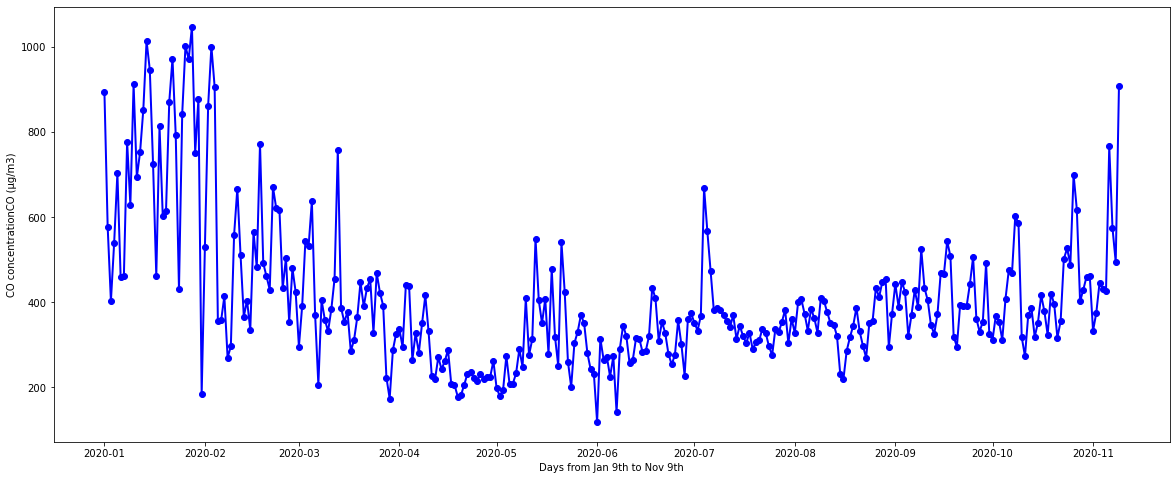

In [257]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8)) 
y=data
y.index = y.index.to_timestamp()
plt.plot(y,color='blue',linewidth=2)
plt.scatter(y.index,CO, color='blue')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

Data is split such that the first 9 months is used for training the model and the last 2 months for testing the model.


<function matplotlib.pyplot.show(close=None, block=None)>

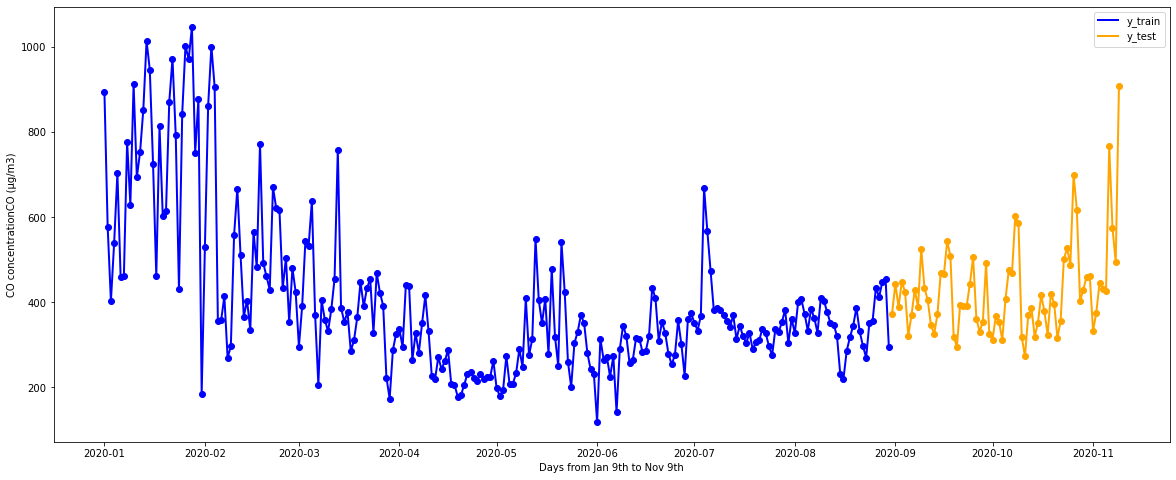

In [258]:

from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,8))
ts=71
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.legend(['y_train', 'y_test'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show

In [107]:
##Relative forecasting horizon¶
fh = np.arange(len(y_test)) + 1
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71])

## Absolute forecasting horizon

We can specify the forecasting horizon using the absolute time points we want to predict. In order to do that, we need to use sktime's ForecastingHorizon class. This way, we can simply create the forecasting horizon from the time points from the test set:

In [108]:
#fh = ForecastingHorizon(y_test.index, is_relative=False)
#fh

# Generating forecasts

Like in scikit-learn, in order to make forecasts, we need to first specify (or build) a model, then fit it to the training data, and finally call predict to generate forecasts for the given forecasting horizon.

`sktime` comes with several forecasting algorithms (or forecasters) and tools for composite model building. All forecaster share a common interface. Forecasters are trained on a single series of data and make forecasts for the provided forecasting horizon.

### Naïve baselines
Let's start with two naïve forecasting strategies which can serve as references for comparison of more sophisticated approaches.

#### ( a) Predicting the last value

We use the SMAPE (symmetric mean absolute percentage error) to quantify the accuracy of our forecasts. A lower sMAPE means higher accuracy.


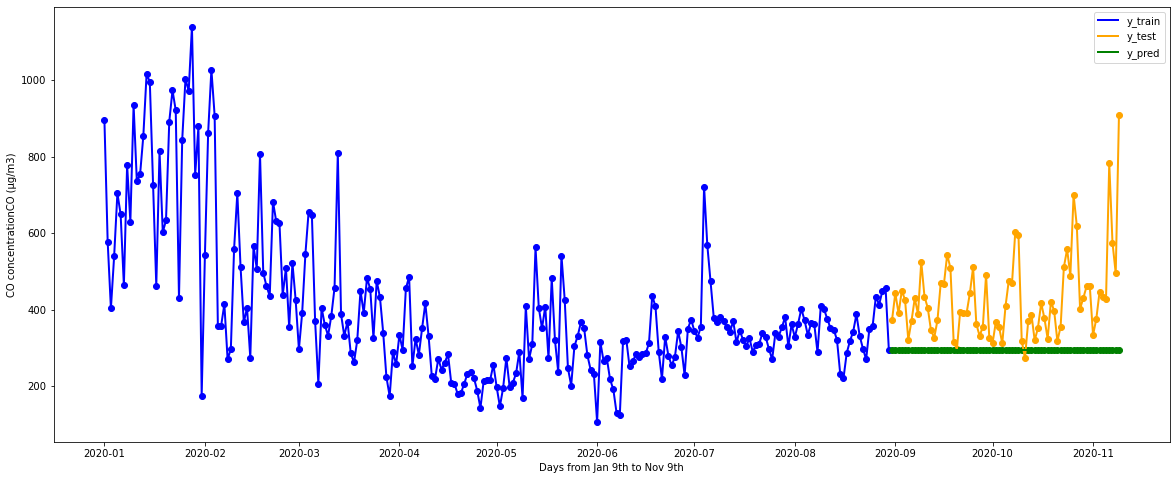

0.3415880861585835

In [109]:
# using sktime
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)




fig= plt.figure(figsize=(20,8))

y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

#### (b) Predicting the last value of the same season

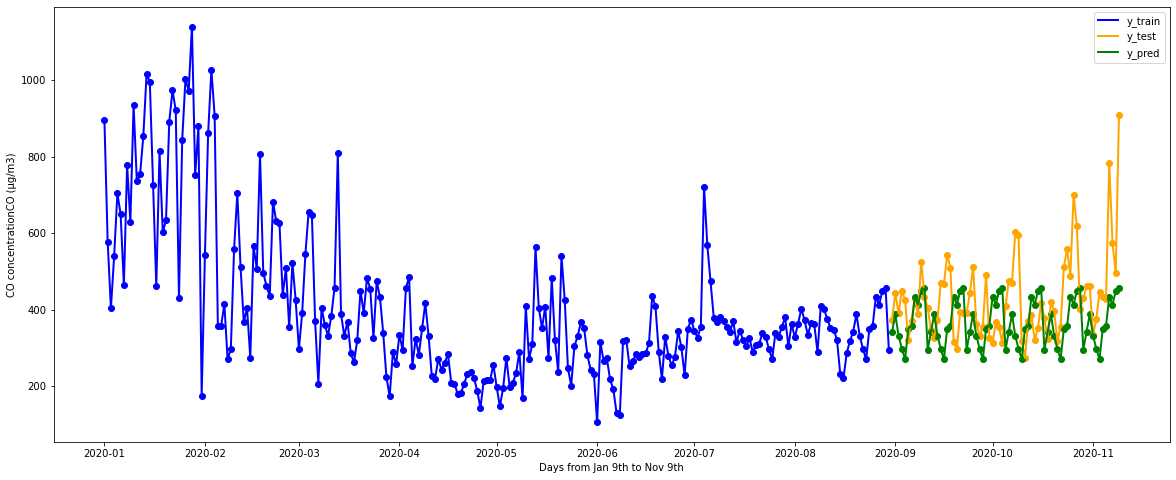

0.24402196428007492

In [110]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

## Forecasting with sktime

### Reduction: from forecasting to regression

`sktime` provides a meta-estimator for this approach, which is:

* **modular** and **compatible with scikit-learn**, so that we can easily apply any scikit-learn regressor to solve our forecasting problem,
* **tuneable**, allowing us to tune hyper-parameters like the window length or strategy to generate forecasts
* **adaptive**, in the sense that it adapts the scikit-learn's estimator interface to that of a forecaster, making sure that we can tune and properly evaluate our model

## K Neighbors Regressor

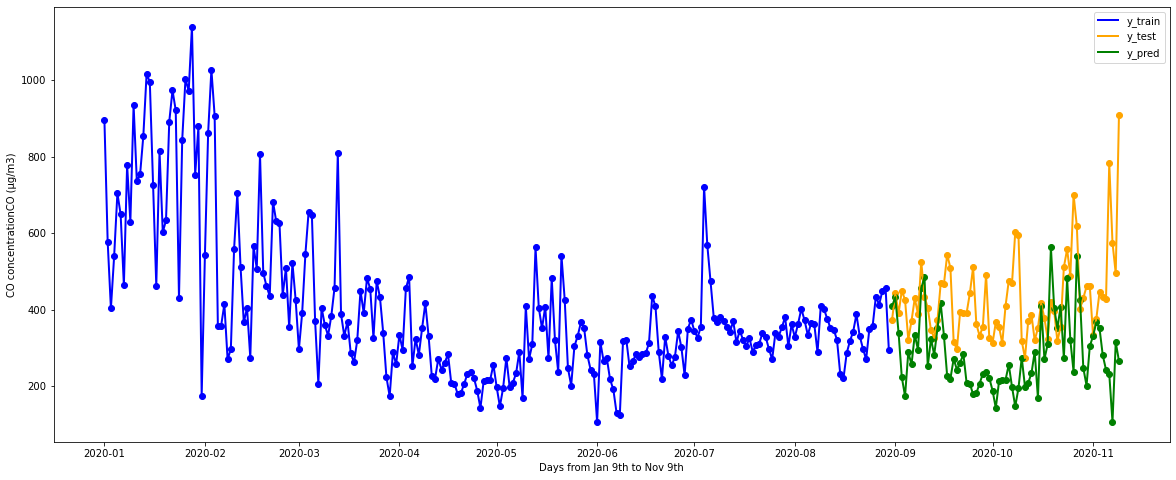

0.4355323845934561

In [111]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(
    regressor=regressor, window_length=12, strategy="recursive"
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

### Statistical forecasters

`sktime` has a number of statistical forecasting algorithms, based on implementations in statsmodels. For example, to use exponential smoothing with an additive trend component and multiplicative seasonality, we can write the following.

Note that since this is monthly data, the seasonal periodicity (sp), or the number of periods per year, is 12.

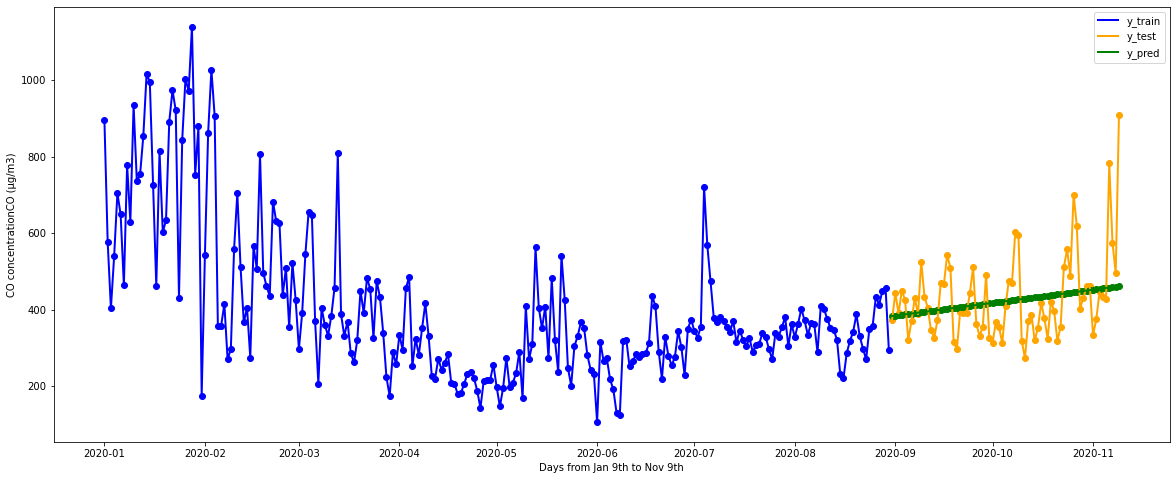

0.17326026081557785

In [112]:
forecaster = ExponentialSmoothing(trend="add", seasonal=None, sp=0)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

The exponential smoothing of state space model can also be automated similar
 to the [ets](https://www.rdocumentation.org/packages/forecast/versions/8.13/topics/ets) function in R.

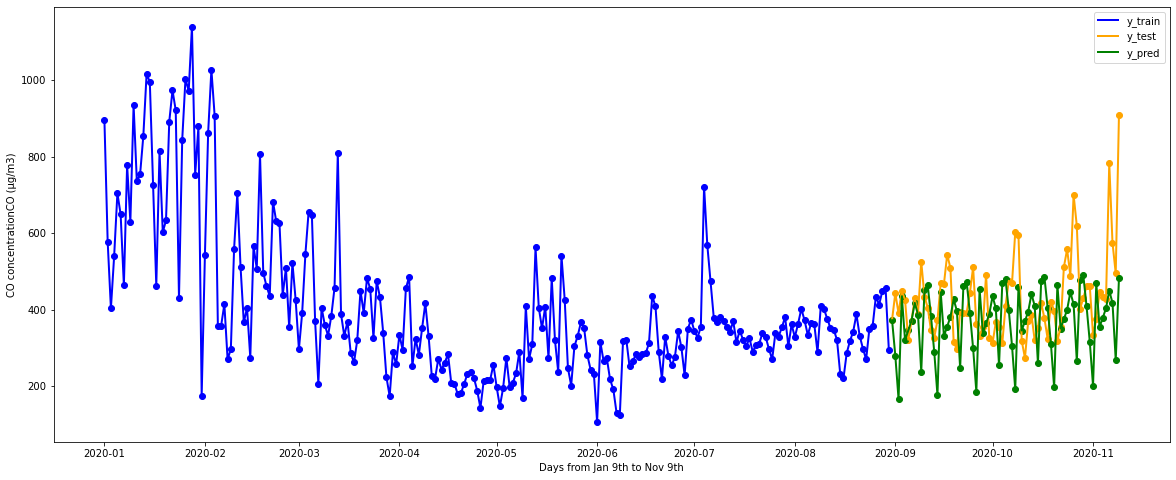

0.288923195555161

In [113]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

Another common model is the ARIMA model. In `sktime`, we interface [`pmdarima`](https://github.com/alkaline-ml/pmdarima), a package for automatically selecting the best ARIMA model. This since searches over a number of possible model parametrisations, it may take a bit longer.

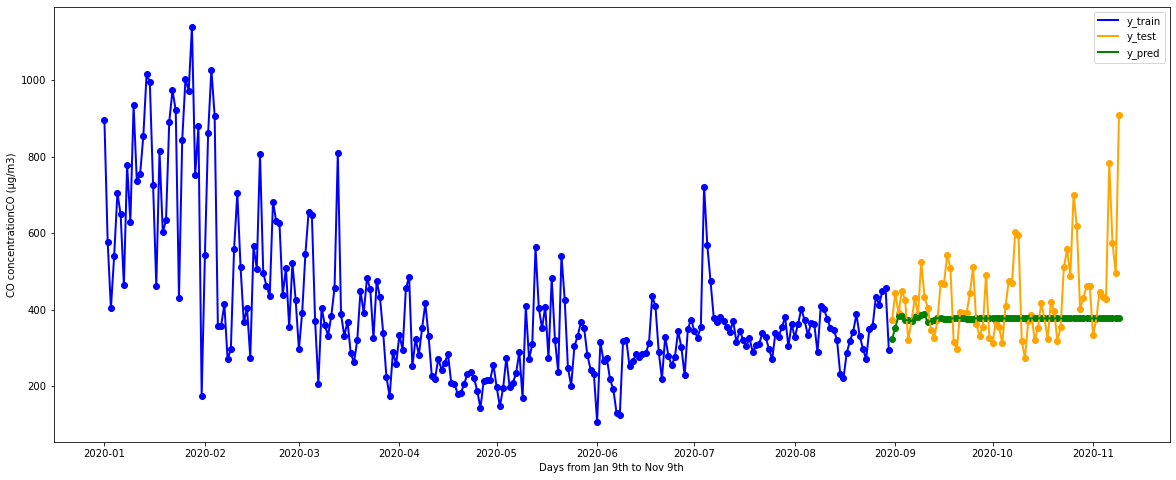

0.18511836458528008

In [114]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

A single ARIMA model can also be manually configured.

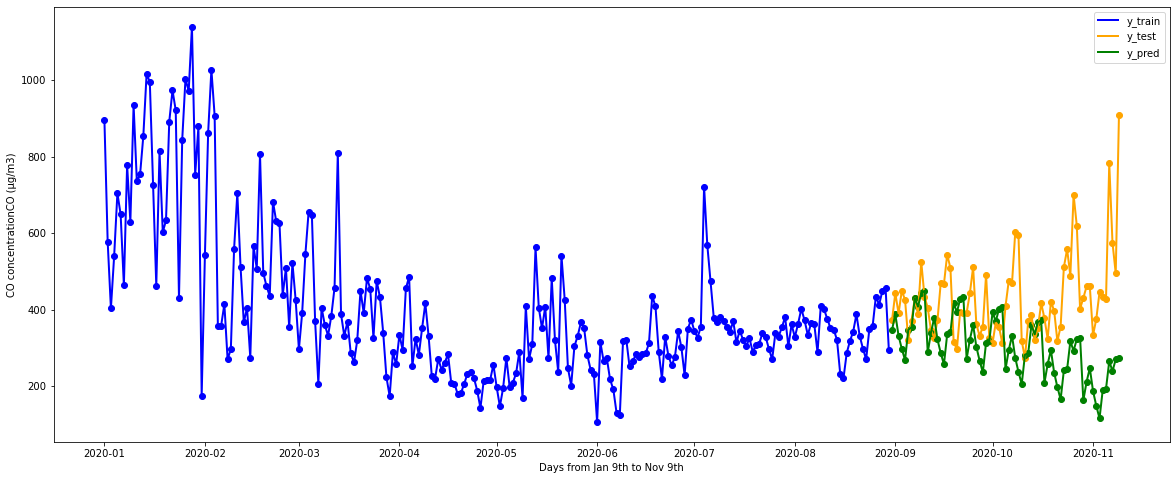

0.3955300811007946

In [115]:
forecaster = ARIMA(
    order=(1, 1, 0), seasonal_order=(0, 1, 0, 12), suppress_warnings=True
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)


BATS and TBATS are two other time series forecasting algorithms that are contained in `sktime` by means of wrapping the package [`tbats`](https://github.com/intive-DataScience/tbats).

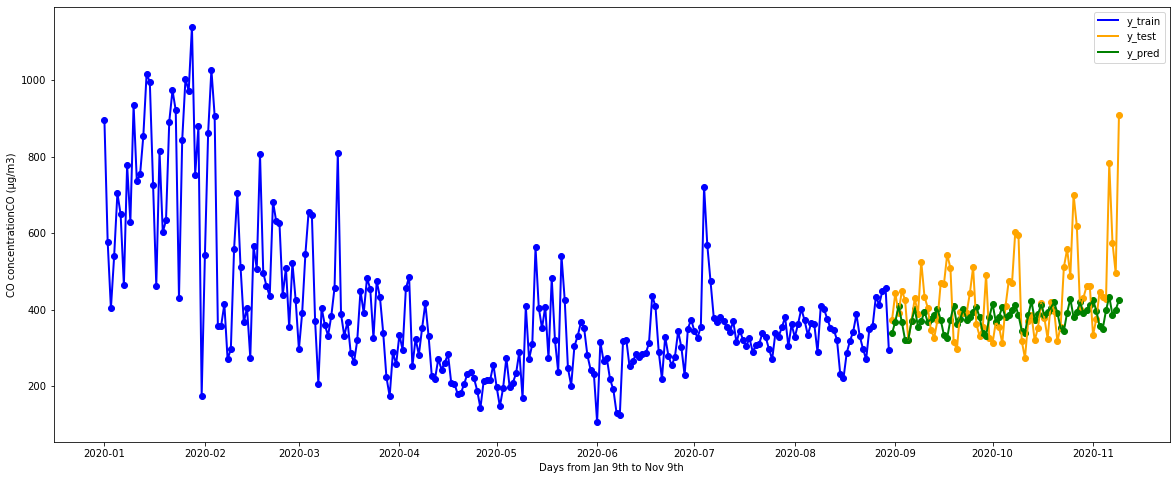

0.1846180796973657

In [116]:
from sktime.forecasting.bats import BATS

forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

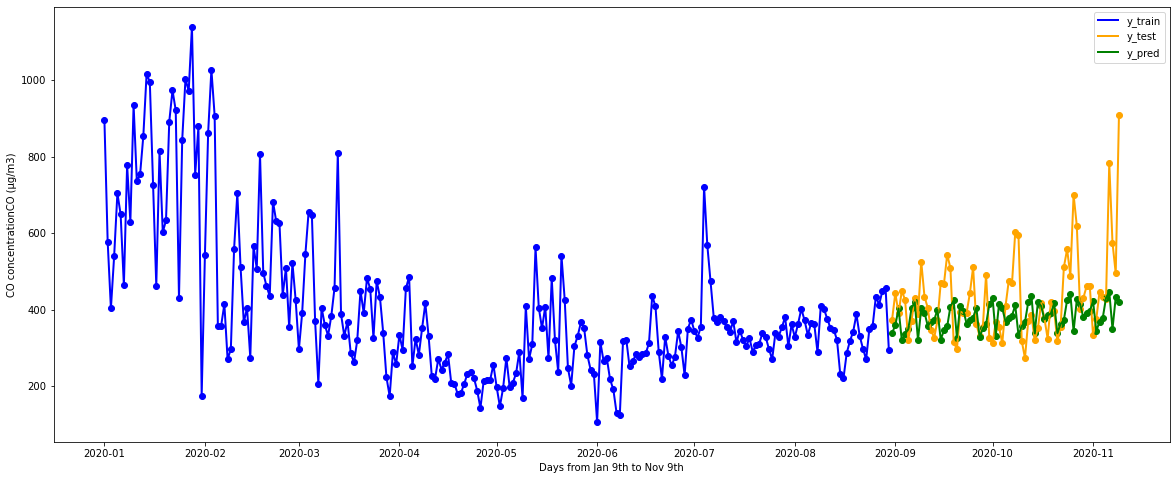

0.1884391460404265

In [117]:
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

## Tuning
In the `ReducedRegressionForecaster`, both the `window_length` and `strategy` arguments are hyper-parameters which we may want to optimise.

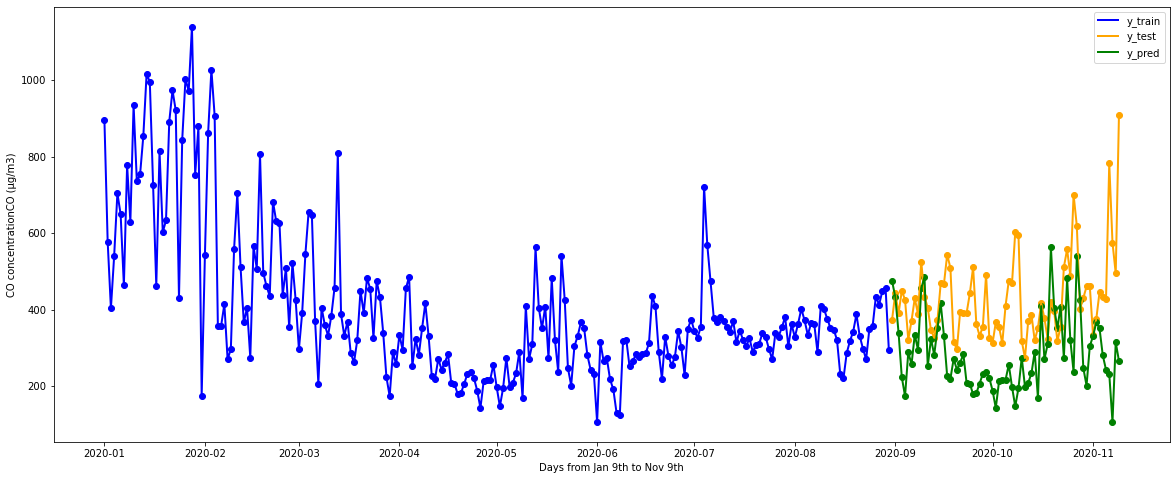

0.4376139430692672

In [118]:
forecaster = ReducedRegressionForecaster(
    regressor=regressor, window_length=15, strategy="recursive"
)
param_grid = {"window_length": [5, 10, 15]}

#  we fit the forecaster on the initial window,
# and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

Using scikit-learn's `GridSearchCV`, we can tune regressors imported from scikit-learn, in addition to tuning `window_length`.

### Detrending
Note that so far the reduction approach above does not take any seasonal or trend into account, but we can easily specify a pipeline which first detrends the data.

`sktime` provides a generic detrender, a transformer which uses any forecaster and returns the in-sample residuals of the forecaster's predicted values. For example, to remove the linear trend of a time series, we can write:

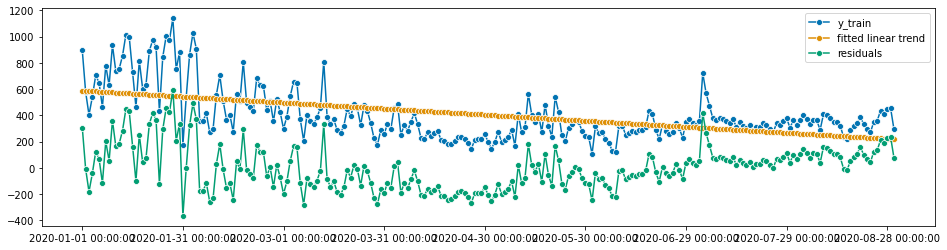

In [121]:
# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions
# of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train))  # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_series(y_train, y_pred, yt, labels=["y_train", "fitted linear trend", "residuals"]);

### Pipelining

Let's use the detrender in a pipeline together with de-seasonalisation. Note that in forecasting, when we apply data transformations before fitting, we need to apply the inverse transformation to the predicted values. For this purpose, we provide the following pipeline class:

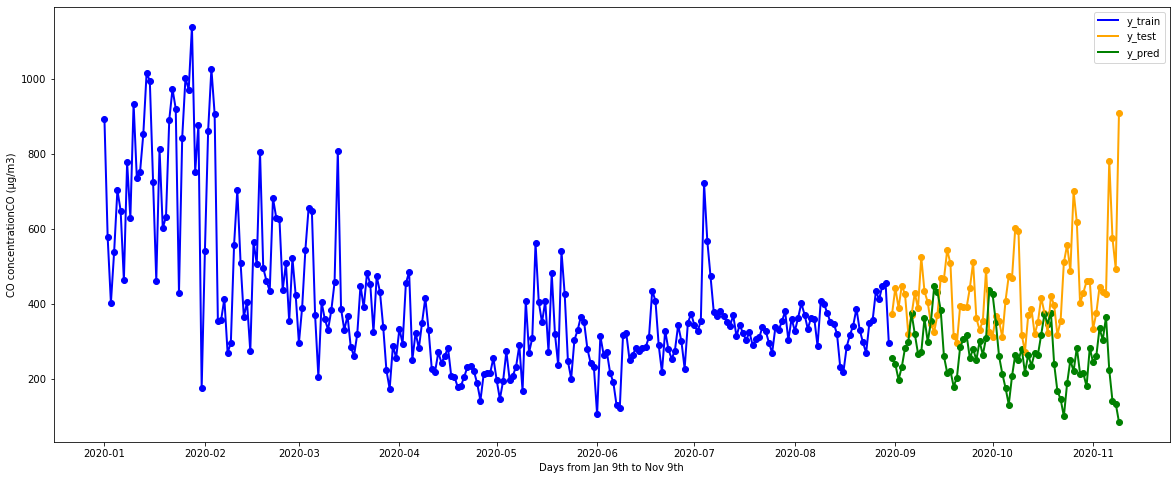

0.4932521639294216

In [122]:
forecaster = TransformedTargetForecaster(
    [
        ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)),
        ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
        (
            "forecast",
            ReducedRegressionForecaster(
                regressor=regressor, window_length=12, strategy="recursive"
            ),
        ),
    ]
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
fig= plt.figure(figsize=(20,8))
y_train, y_test = temporal_train_test_split(y, test_size=ts)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=ts)
CO_train, CO_test = temporal_train_test_split(CO, test_size=ts)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

## Prediction intervals
So far, we've only looked at point forecasts. In many cases, we're also interested in prediction intervals. `sktime`'s interface support prediction intervals, but we haven't implemented them for all algorithms yet.

Here, we use the Theta forecasting algorithm:

In [123]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
smape_loss(y_test, y_pred)

0.22456151661482257

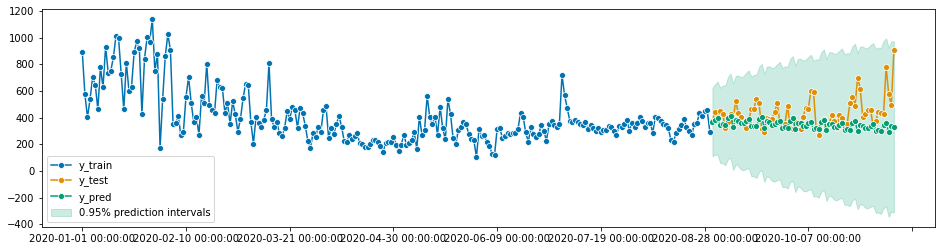

In [124]:
fig, ax = plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();

## Summary

As we have seen, in order to make forecasts, we need to first specify (or build) a model, then fit it to the training data, and finally call predict to generate forecasts for the given forecasting horizon.

* `sktime` comes with several forecasting algorithms (or forecasters) and tools for composite model building. All forecaster share a common interface. Forecasters are trained on a single series of data and make forecasts for the provided forecasting horizon.

* `sktime` has a number of statistical forecasting algorithms, based on implementations in statsmodels. For example, to use exponential smoothing with an additive trend component and multiplicative seasonality, we can write the following.


## Useful resources
* For more details, take a look at [our paper on forecasting with sktime](https://arxiv.org/abs/2005.08067) in which we discuss the forecasting API in more detail and use it to replicate and extend the M4 study.
* For a good introduction to forecasting, see [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018](https://otexts.com/fpp2/).
* For comparative benchmarking studies/forecasting competitions, see the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) and the currently running [M5 competition](https://www.kaggle.com/c/m5-forecasting-accuracy/overview).

# Forecasting using hcrystalball 

This tutorial shows, how to use [HCrystalBall](https://github.com/heidelbergcement/hcrystalball)'s compliant estimator within `sktime` eco-system for the time-series forecasting.

There is an existing [documentation](https://hcrystalball.readthedocs.io/en/latest/) containing full set of features (also with [tutorial](https://hcrystalball.readthedocs.io/en/latest/examples/02_tutorial.html)), so the main goal of this notebook is highlighting differences and additions to `sktime` possibilites.

In [125]:
#Importing the data labelled as excel file
import pandas as pd
data=pd.read_excel("DLI_CO_DATA.xlsx")
data=data.iloc[:,[0,1,2,3,4,5,6]]

In [126]:
data.interpolate()
data.shape

(7536, 7)

In [127]:
# Deriving the two columns: Date/Time and CO
data=data.iloc[:,[0,4]]
data.columns=['Date','CO']
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('H')
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()
data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
mean_value=data['CO'].mean()
data['CO'].fillna(value=data['CO'].mean(), inplace=True)


In [128]:
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#Generating timeseries data based on the two lists
data= pd.Series(CO,Date)
CO=pd.Series(CO)

In [129]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting import plot_series
from warnings import simplefilter

import numpy as np

simplefilter("ignore", FutureWarning)

y = data
# our HCrystalball wrapper currently only supports pd.DatetimeIndex types
y.index = y.index.to_timestamp()
y_train, y_test = temporal_train_test_split(y, test_size=71)
print(y_train.shape[0], y_test.shape[0])

243 71


In [130]:
from hcrystalball.ensemble import SimpleEnsemble
from hcrystalball.wrappers import (
    ExponentialSmoothingWrapper,
    SarimaxWrapper,
    get_sklearn_wrapper,
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from sktime.forecasting.hcrystalball import HCrystalBallForecaster

In [131]:
models = {
    "sarimax": SarimaxWrapper(init_with_autoarima=True, autoarima_dict={"m": 12}),
    "smoothing": ExponentialSmoothingWrapper(
        trend="add", seasonal=None, seasonal_periods=0
    ),
    "sklearn_linear": get_sklearn_wrapper(ElasticNet),
    "sklearn_forest": get_sklearn_wrapper(RandomForestRegressor, n_estimators=100),
    "avg_ensemble": SimpleEnsemble(
        base_learners=[
            get_sklearn_wrapper(ElasticNet, name="sklearn_linear"),
            ExponentialSmoothingWrapper(
                trend="add",
                seasonal="multiplicative",
                seasonal_periods=12,
                name="smoothing",
            ),
        ],
        ensemble_func="mean",
    ),
}

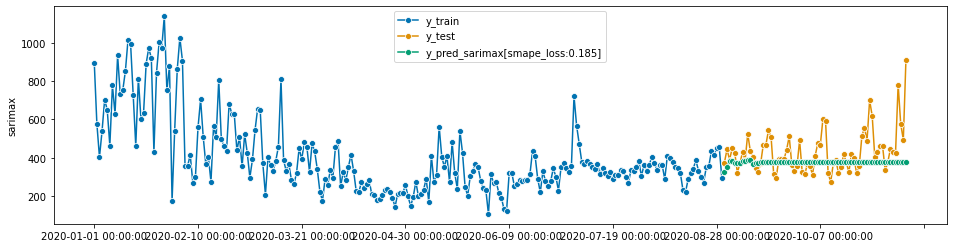

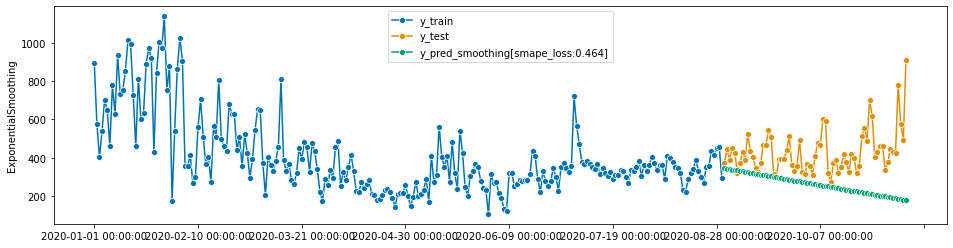

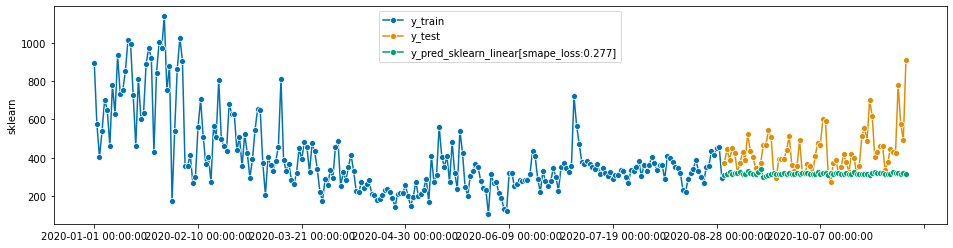

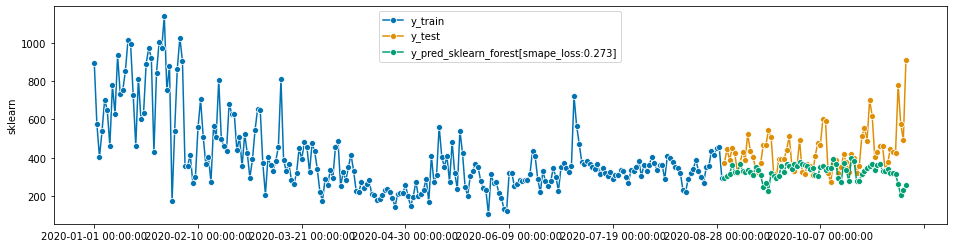

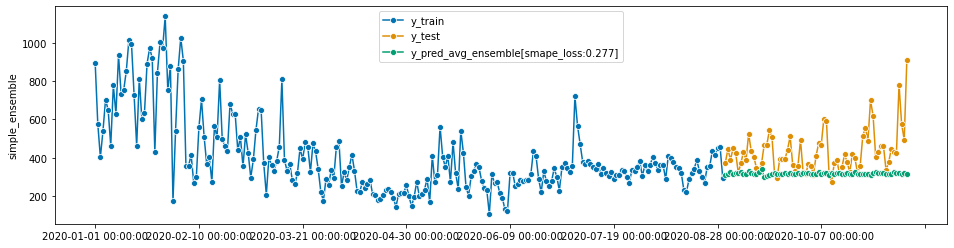

In [132]:
fh = np.arange(len(y_test)) + 1
for model_name, model in models.items():
    forecaster = HCrystalBallForecaster(model)
    # if provided in the data, exogenous variables are supported over X_train, X_pred
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)
    plot_series(
        y_train,
        y_test,
        y_pred,
        labels=[
            "y_train",
            "y_test",
            f"y_pred_{model_name}[smape_loss:{smape_loss(y_pred, y_test):.3}]",
        ],
    )